In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append("..")

%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format
plt.style.use('fivethirtyeight')

In [2]:
# https://www.kaggle.com/austinreese/craigslist-carstrucks-data/
df = pd.read_csv(Path('../data/vehicles.csv'))

# First look at the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

In [4]:
df.sample(5, random_state=3142)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
16700,7089251473,https://appleton.craigslist.org/ctd/d/ripon-20...,appleton-oshkosh-FDL,https://appleton.craigslist.org,20995,"2,019.00",ford,transit connect van,excellent,4 cylinders,...,fwd,NaN,mini-van,NaN,https://images.craigslist.org/00C0C_8GgtbmxApd...,2019 Ford Transit Connect Van XL Mini-Van FWD...,nan,wi,43.85,-88.86
287631,7089164519,https://goldcountry.craigslist.org/ctd/d/sacra...,gold country,https://goldcountry.craigslist.org,10995,"2,006.00",toyota,tacoma,excellent,NaN,...,rwd,NaN,pickup,grey,https://images.craigslist.org/00k0k_312K6dIqAt...,2006 *** Toyota Tacoma Base 2dr Regular Cab SB...,nan,ca,38.62,-121.40
172133,7076205603,https://yakima.craigslist.org/ctd/d/pasco-2017...,yakima,https://yakima.craigslist.org,32999,"2,017.00",chevrolet,silverado 2500 hd lt,NaN,NaN,...,4wd,NaN,truck,white,https://images.craigslist.org/00202_8EbuXezqLM...,2017 Chevrolet Silverado 2500 HD LT 4x4 **Clea...,nan,wa,46.23,-119.13
146776,7088157924,https://tucson.craigslist.org/cto/d/tucson-201...,tucson,https://tucson.craigslist.org,1,"2,014.00",honda,accord,like new,4 cylinders,...,NaN,full-size,sedan,blue,https://images.craigslist.org/00P0P_5Oy0uGNrWg...,2014 Accord Clean title Great condition No eng...,nan,az,32.18,-110.82
284965,7093073193,https://seattle.craigslist.org/see/ctd/d/lynnw...,seattle-tacoma,https://seattle.craigslist.org,16988,"2,003.00",ford,f-250 super duty,excellent,NaN,...,4wd,NaN,pickup,grey,https://images.craigslist.org/01515_7XwjMt0Tos...,2003 *** Ford F-250_ F250_ f250_ F 250_ Super ...,nan,wa,47.87,-122.27


Let's check what proportion of each column is missing

In [5]:
round(df.isna().sum() / len(df) * 100, 2)

id                             0.00
url                            0.00
region                         0.00
region_url                     0.00
price                          0.00
year                           0.18
manufacturer                   4.37
model                          1.48
condition                     43.73
cylinders                     40.48
fuel                           0.63
odometer                      18.34
title_status                   0.54
transmission                   0.74
vin                           41.58
drive                         28.86
size                          68.77
type                          27.32
paint_color                   32.28
image_url                      0.00
description                    0.00
county                       100.00
state                          0.00
lat                            1.66
long                           1.66
dtype: float64

There are some columns with a high proportion of missing data which will be important when considering the model. Something has gone wrong with scraping the county column from Craigslist so that one may simply be removed. Let's take a look at the values in some of the columns

In [6]:
df['manufacturer'].unique()

array(['acura', 'bmw', 'jaguar', 'honda', 'chevrolet', 'kia', 'toyota',
       'nissan', 'volkswagen', 'ford', 'gmc', 'subaru', 'ram', 'lexus',
       'volvo', 'dodge', 'buick', 'jeep', 'hyundai', 'mercedes-benz', nan,
       'cadillac', 'audi', 'infiniti', 'pontiac', 'mini', 'chrysler',
       'rover', 'mazda', 'lincoln', 'mercury', 'fiat', 'tesla',
       'harley-davidson', 'saturn', 'mitsubishi', 'alfa-romeo',
       'aston-martin', 'ferrari', 'land rover', 'porche', 'datsun',
       'morgan', 'hennessey'], dtype=object)

In [7]:
df['model'].unique()

array(['tl', '335', 'xf', ..., 'mercedez benz Glk', 'van 1500 cargo',
       '3500 laramie megacab'], dtype=object)

In [8]:
df['condition'].unique()

array([nan, 'excellent', 'good', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [9]:
df['title_status'].unique()

array(['clean', 'salvage', 'rebuilt', 'lien', nan, 'missing',
       'parts only'], dtype=object)

In [10]:
len(df['state'].unique())

51

What is the 51st state of the US? Could it be Puerto Rico? Guam?

Actually the dataset has 2967 listings for DC (Washington DC) which is not a state but maybe is classified as one on Craiglist. We will leave them in the dataset

In [11]:
len(df[df['state'] == 'dc'])

2967

Price is going to be one of the most important columns so let's check out it's summary statistics.

In [12]:
df['price'].describe()

count             539,759.00
mean              195,421.39
std            22,082,524.01
min                     0.00
25%                 4,400.00
50%                 9,500.00
75%                17,926.00
max         4,294,967,295.00
Name: price, dtype: float64

There are clearly some very large, (almost certainly) incorrect values for the price column which are skewing the data. Depending on the model these will probably need to be removed.

In [13]:
df['price'].nlargest(10)

276765    4294967295
246549    4198286601
404209    3795255043
141176    3755744318
243376    3755744309
444336    3736928711
444342    3736928711
246564    3567587327
421428    3567587327
246547    3253587287
Name: price, dtype: int64

In [14]:
(df['price'] > 100000).sum()

498

In [15]:
(df['price'] == 0).sum()

44689

Entering a price of 0 is most likely just a mistake, unless the seller is literally giving away the vehicle. The listings below suggest the vehicle would be worth some money.

In [16]:
df[df['price'] == 0].head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,"2,011.00",bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,nan,nc,nan,nan
33,7088697235,https://greensboro.craigslist.org/ctd/d/nissan...,greensboro,https://greensboro.craigslist.org,0,"2,017.00",nissan,370z,NaN,6 cylinders,...,rwd,NaN,coupe,white,https://images.craigslist.org/00R0R_aUdQLPRBeW...,Nissan 370Z NISMO Tech 2D Coupe Navigation Ful...,nan,nc,nan,nan
44,7092615209,https://southjersey.craigslist.org/ctd/d/new-o...,south jersey,https://southjersey.craigslist.org,0,"2,019.00",NaN,🔴100% APPROVAL RATE🔴,new,other,...,rwd,full-size,other,custom,https://images.craigslist.org/00x0x_lrea3FJu7R...,You Don't Need to Live With Crappy Credit Anym...,nan,nj,nan,nan
46,7088676297,https://greensboro.craigslist.org/ctd/d/high-p...,greensboro,https://greensboro.craigslist.org,0,"2,005.00",honda,cr-v,NaN,NaN,...,4wd,NaN,SUV,black,https://images.craigslist.org/00303_fntGzngiF1...,2005 Honda CR-V EX 4WD AT Offered by: Home...,nan,nc,36.00,-80.03
52,7088670589,https://greensboro.craigslist.org/ctd/d/greens...,greensboro,https://greensboro.craigslist.org,0,"2,000.00",toyota,4runner,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00v0v_62WKbilIjd...,"Very nice vehicle, with the dependability of T...",nan,nc,36.12,-79.77


In [17]:
df['odometer'].describe()

count             440,783.00
mean              100,800.80
std               176,705.80
min                     0.00
25%                47,038.50
50%                93,300.00
75%               137,755.00
max            64,809,218.00
Name: odometer, dtype: float64

Looking at the most common entries in the description column these are probably from a company whose business sells cars on Craigslist. They have almost 200 listings which isn't a large proportion of the dataset. If we perform a train test split we could ensure that listings with the same description all go in either the training or test to reduce leakage.

In [18]:
df['description'].value_counts().head(3)

You Don't Need to Live With Crappy Credit Anymore...I'm not sure how you found this ad, but consider yourself very lucky! You're about to discover the little known loophole to get perfect credit within 24-72 hours from right now...Get APPROVED for...New Car [APPROVED!]House / Apartment Rental [APPROVED!]Credit Cards [APPROVED!]Loans [APPROVED!]How is this possible? You ask; simple. With a new CPN! It's a 100% legal way to get perfect credit in 24-72 hours...Actors, Congressmen/women and Celebrities use this strategy all the time, now you can too!Within 24-72 hours from right now, you can get approved for things like; a new car, loans, an apartment rental, credit cards... The list goes on and on...If you are tired of being denied credit...VISIT US @  >>> https://FastCreditFixers.com <<<    191
TAX TIME SPECIAL!!!! 30TH YEAR ANNIVERSARY!!!!  BUY NOW WITH NO MONEY!!! WE WAIT FOR TAX $$  $1000 DOWN - ASK ABOUT OUR NO CREDIT CHECK!!!!  OVER 250+ VEHICLES IN STOCK!!!!!  CALL 321-242-0328  OU

## Conclusions from the initial exploration

There is a lot of car data here and the dataset may be usable. Some columns have a high proportion of missing values but they are probably the least useful (except `condition`). Every column will have outliers such as price 0 or miles driven in the billions. These will need to be removed before a model is trained. Let's summarize what will need to be done by the data formatting function

* Remove column `county`
* Set the type of the numerical columns to the appropriate choice `year` -> `int`
* Set the `id` column as the index of the dataframe
* Remove all obvious outliers from the numerical columns. Probably all zero entries and above a certain max value.

# Visualizing the Data

Let's make some plots to get a better sense of the data. We will look for unusual patterns which would suggest the data is inaccurate. Here are some basic assumptions about cars which should be clear in the data

* The older a vehicle is the lower it's value
* The more mileage a vehicle has the lower it's value
* We expect to see more listings for popular vehicles such as Toyota Accord, Ford F-150
* Older vehicles should have on average worse condition
* The more miles on the clock the lower the condition of the vehicle

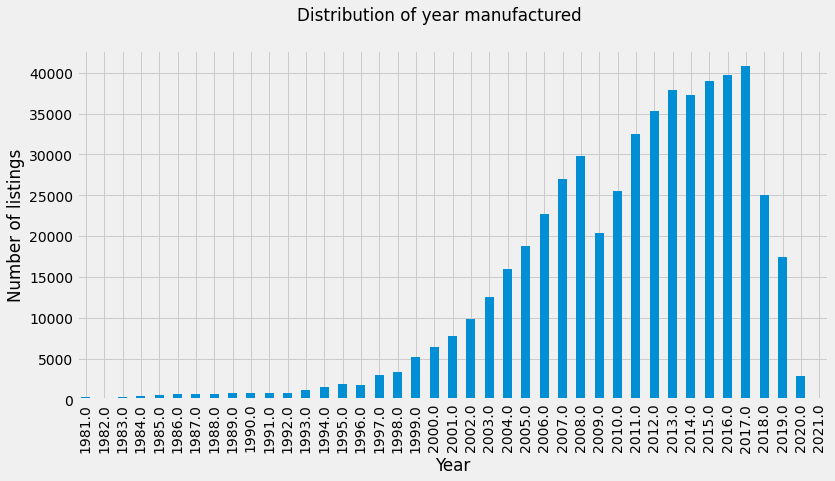

In [19]:
fig = plt.figure(figsize=(12,6))
fig.suptitle("Distribution of year manufactured")
plt.xlabel("Year")
plt.ylabel("Number of listings")
df[df['year'] > 1980]['year'].value_counts().sort_index().plot.bar()

This plot is what we expect to see. There should be more cars listed which were manufactured recently but not in the most recent few years as people will tend to hold onto them for a period of time. The number of cars for sale which are very old declines as cars are written off. We can even see how the 2008 financial crisis effected the car industry. It is possible fewer cars were manufactured in those years as there was less demand or people simply didn't buy new cars in those years.

In [20]:
colors = {'new': 'green', 'like new': 'blue', 'excellent': 'orange', 'good': 'yellow', 'fair': 'red', 'salvage': 'black'}
def plot_odo_price(manufacturer, model, year):
    manu = df[df['manufacturer'] == manufacturer]
    mod = manu[manu['model'] == model]
    modyear = mod[mod['year'] == year].copy()
    modyear.dropna(subset=['condition'], inplace=True)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title(f'{manufacturer}, {model} from {year}')
    ax.set_xlabel("Miles on the clock")
    ax.set_ylabel("Price")
    l = []
    c = []
    for cond in modyear.condition.unique():
        modyearcond = modyear[modyear['condition'] == cond]
        l.append(ax.scatter(x=modyearcond['odometer'], y=modyearcond['price'], c=colors[cond]))
        c.append(cond)
    ax.legend(l, c)
    plt.show()

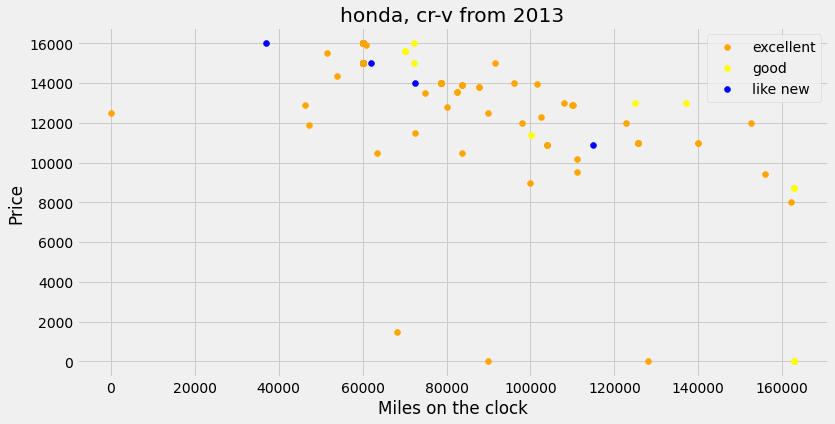

In [21]:
plot_odo_price('honda', 'cr-v', 2013)

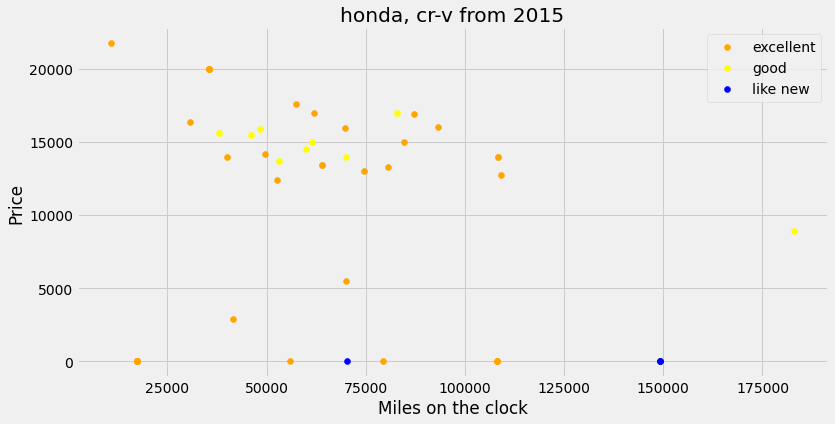

In [22]:
plot_odo_price('honda', 'cr-v', 2015)

This year of Honda CR-V has a particuarly high proportion of outliers. A "like new", vehicle with 150,000 miles on the clock is not worth 0.

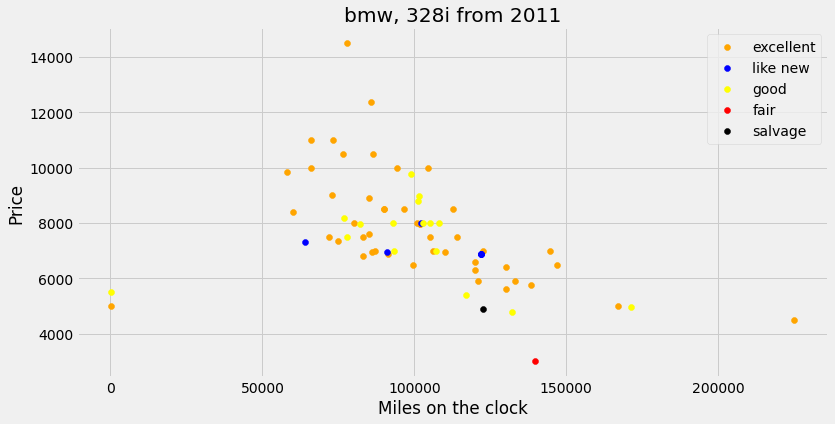

In [23]:
plot_odo_price('bmw', '328i', 2011)

The value of a 2011 BMW, 328i seems to decline more sharply than other kinds of cars, as the miles on the clocks increases. This could be because it is known to break down after increased mileage or maybe people prefer to buy sporty vehicles with fewer miles on the clock.

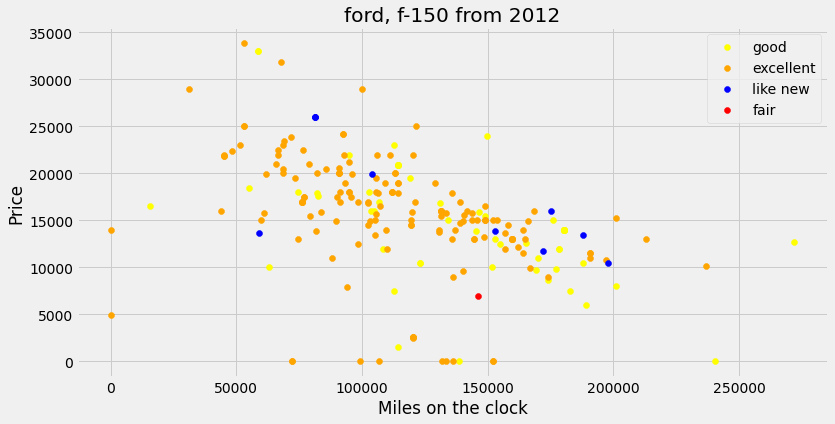

In [24]:
plot_odo_price('ford', 'f-150', 2012)

The Ford F-150 is one of the most popular trucks in the US and we can see there are a lot of listings for the 2012 model with a wide variety of milegage. We see a clear linear relationship between mileage and price.

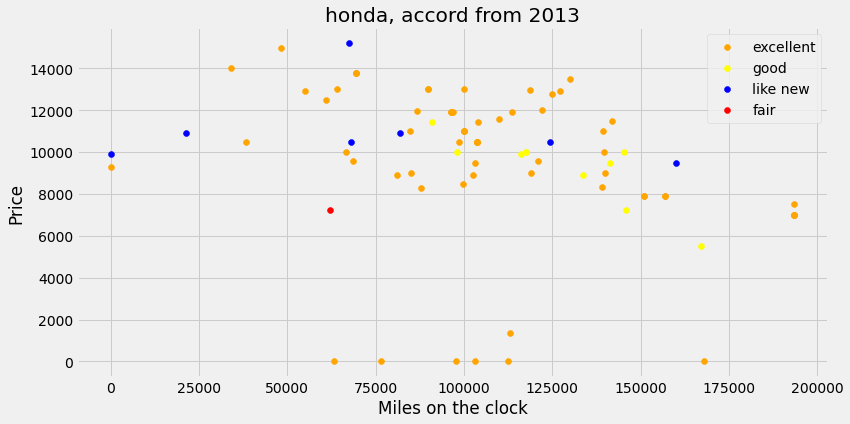

In [25]:
plot_odo_price('honda', 'accord', 2013)

It seems Honda Accords hold their value quite well as the miles on the clock increases. This could indicate they are reliable cars that have good longevity.

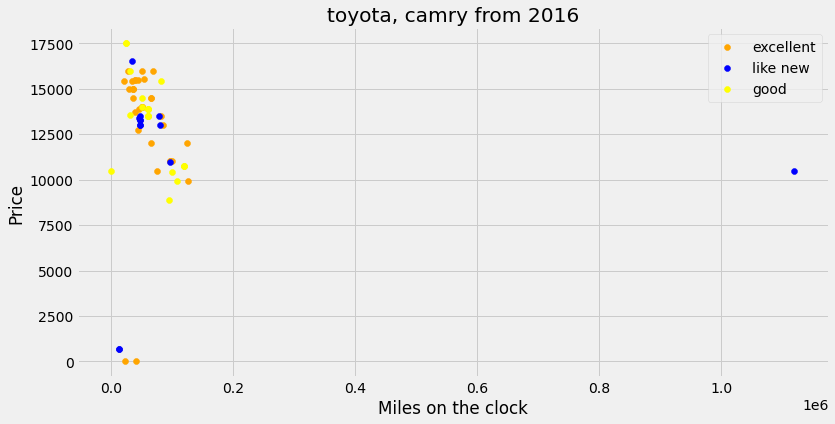

In [26]:
plot_odo_price('toyota', 'camry', 2016)

Above we can see a clear outlier for the `odometer` value of a 2016 Toyota Camry which has ruined the scale of the plot.

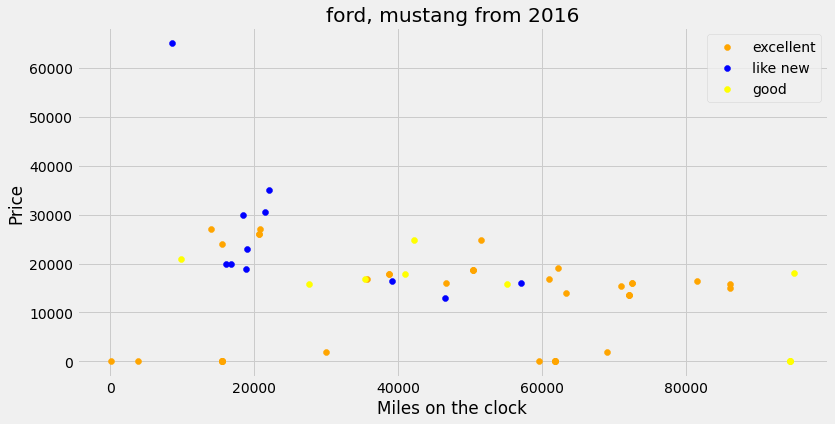

In [27]:
plot_odo_price('ford', 'mustang', 2016)

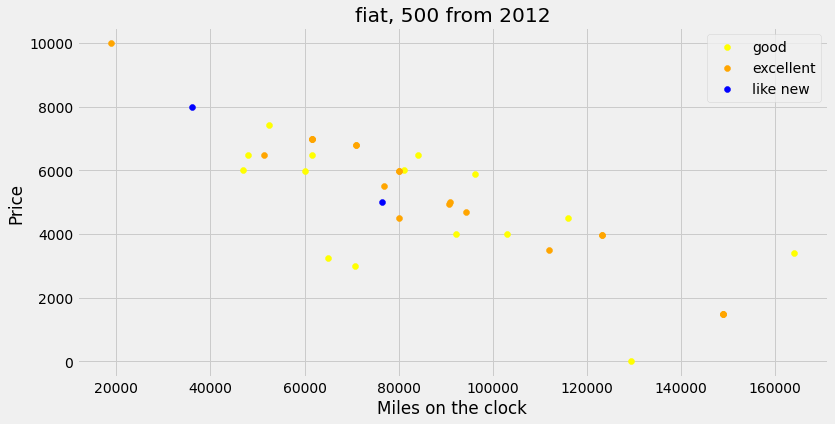

In [28]:
plot_odo_price('fiat', '500', 2012)

In [29]:
def plot_year_price(manufacturer, model):
    manu = df[df['manufacturer'] == manufacturer]
    mod = manu[manu['model'] == model].copy()
    mod.dropna(subset=['condition'], inplace=True)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title(f'{manufacturer}, {model}')
    ax.set_xlabel("Year")
    ax.set_ylabel("Price")
    l = []
    c = []
    for cond in mod.condition.unique():
        modcond = mod[mod['condition'] == cond]
        l.append(ax.scatter(x=modcond['year'], y=modcond['price'], c=colors[cond]))
        c.append(cond)
    ax.legend(l, c)
    plt.show()

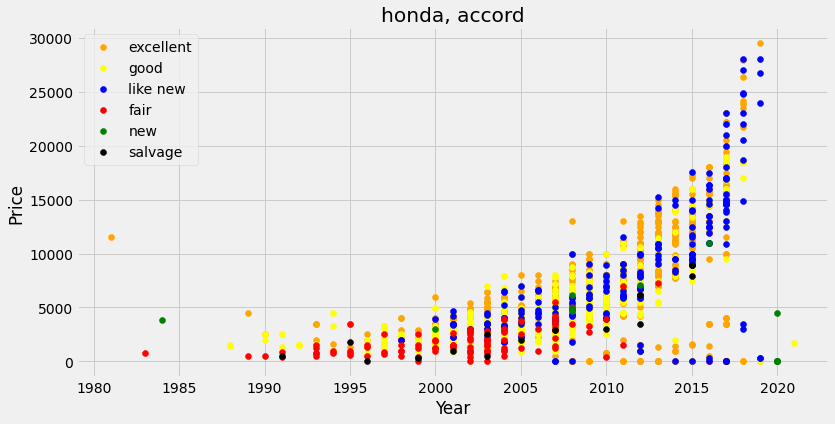

In [30]:
plot_year_price('honda', 'accord')

The Toyoto Camry Accord is one of the most popular vehicles in the US and we can see a clear exponential relationship between the year of manufacture and price. Note the "like new" 1998 model being sold and the "good" model being sold from the future

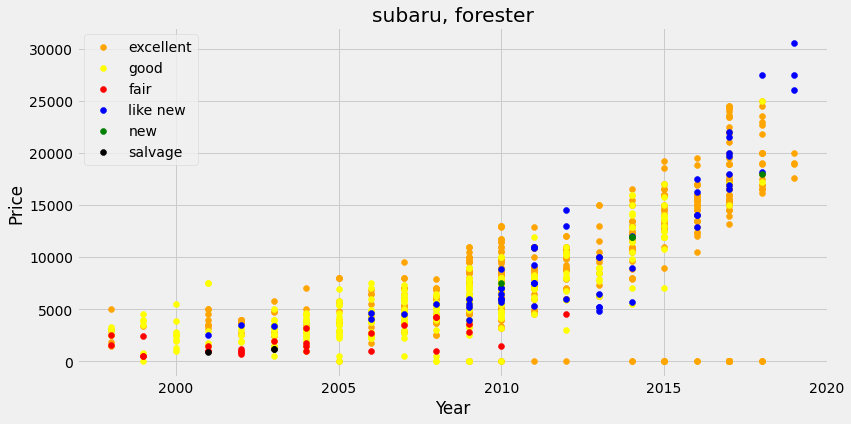

In [31]:
plot_year_price('subaru', 'forester')

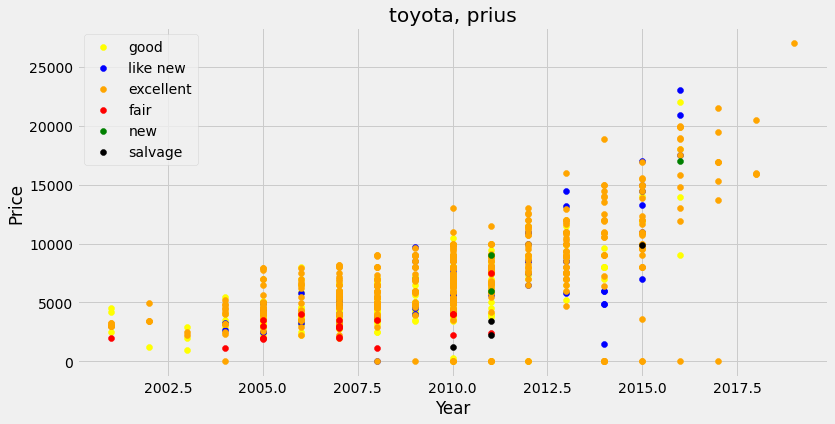

In [32]:
plot_year_price('toyota', 'prius')

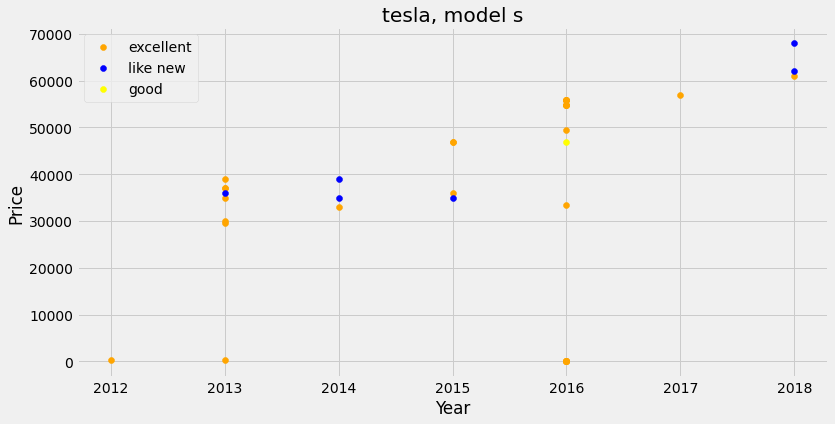

In [33]:
plot_year_price('tesla', 'model s')

We see very few listings for a Tesla Model S on craigslist. One would imagine these vehicles are being sold through other mediums. There are also comparatively few units compared to conventional vehicles.

## Conclusions from the visualizations

Columns `year, odometer, price` seem relatively accurate as they match the basic assumptions about cars mentioned earlier. We see many outliers in the data which should be easy to remove. There are some datapoints which may be outliers but we cannot tell. Vehicles with >150,000 miles on the clock which are over 10 years old, will probably not be "like new" but we can't say.